In [1]:
import numpy as np
import numpy.random as rand

In [99]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib import colors
#TODO:
# Avoid block in start position
class Gridworld:
    def __init__(self,shape:tuple, num_pun:int, blocks=10, terminal_reward=10, num_blocks=3):
        """
        
        Args:        
            num_pun (int): number of negative rewards that are randomly placed on the board
        
        """
        self.shape = shape
        self.grid = np.zeros(shape)  
        
        #agent position
        self.agent_position = [0,0]
        self.grid[0,0] = 2
        self.fig = plt.figure()
        #set negative rewards        
        for i in range(num_pun):
            self.grid[rand.randint(shape[0]), rand.randint(shape[1])] = -1
            
        #set terminal state
        x,y = np.where(self.grid != -1)   
        i = rand.randint(len(list(x)))
        self.grid[x[i],y[i]] = 10
        
        plt.ion()
            
        #self.q_table = np.zeros(shape)
        
        #set blocks. Marked with 5
        x,y = np.where(self.grid == 0) 
        for i in range(num_blocks):
            idx = rand.randint(len(list(x)))
            self.grid[x[idx], y[idx]] = 5
            
        print(self.grid)
        
    def reset(self):
        """should reset the state"""
        
        self.grid[:,:] = 0
        
        
    
    def visualize(self, agent):
        print("in visualize")
        #prin
        # print("agent position",agent.position)
        
        vis = self.grid.copy()
        vis[agent.position[0], agent.position[1]] = 2
        
        print(vis)
        
#         ax = self.fig.add_subplot(111)
#         shw = ax.imshow(vis)

  
#         # make bar
#         #bar = plt.colorbar(shw)
        
#         plt.colorbar(ax)
#         i = input()
#         plt.show()
#         self.fig.canvas.draw()
#         self.fig.canvas.flush_events()
    
    def step(self, action, agent):
        
        """        
        Args:
            action: transition values
        
        
        """   
        print("Action", action)
        end = False
                 
        print("Agent position", agent.position)
        print(type(agent.position))
        print("action", action)
        print(type(action))
        #update agents' position/state
        #rint("action", action)
        #new_pos = [self.agent_position[0] + action[0], self.agent_position[1] + action[1]]
        new_pos = [agent.position[0] + action[0], agent.position[1] + action[1]]
        
        
        #if out of range 
        #print("in Step executrion")
        #print("aaction", action)
        
        #print("agent old position", agent.position)
       # print("New pos y", new_pos[1])
        #print("grid value", self.grid[new_pos[0], new_pos[1]])
        if (new_pos[0] < self.shape[0]) and  (new_pos[0]>=0) and (new_pos[1] < self.shape[1]) and (new_pos[1] >= 0):
            
            #print("No wall")
        
        
        #if obstacle
        
            if self.grid[new_pos[0], new_pos[1]] == 5:            
                pass

            else: 
                print("Should update")
                print(new_pos)
                #self.agent_position = new_pos
                agent.position = new_pos
                print(agent.position)

                if self.agent_position == 10: 
                    end = True      

        print("Agent new position", agent.position)
        #reward        
        reward = self.grid[agent.position[0], agent.position[1]]
        
        #print
        self.visualize(agent)
        
        return (reward, end)
        
        
        

In [100]:
class Agent:
    def __init__(self, shape, actions=["up", "down", "left", "right"]):
        self.position = [0,0]
        self.actions = actions        
        self.q_table = np.zeros((len(self.actions), shape[0], shape[1]))
        
#     def e_greedy(self):      
        
#         eps = 0.25
#         p = np.random.random()        
#         #random
#         if p <= eps: 
#             ind = np.random.randint(0,4)
#             return ind, self.actions[ind], self.q_table[ind, self.position[0], self.position[1]]
        
#         #choose according to policy/max Q-value action
#         else:
#             q_vals = self.q_table[:, self.position[0], self.position[1]]
            
#             #print(q_vals)
#             #print(type(q_vals))
#             max_q_vals_ind = np.argmax(q_vals)
            
#             return max_q_vals_ind, self.actions[max_q_vals_ind], self.q_table[max_q_vals_ind, self.position[0], self.position[1]]
        
    def select_action(self):               
        
        eps = 0.25
        p = np.random.random()        
        #random
        if p <= eps: 
            ind = np.random.randint(0,4)
            return ind, self.actions[ind], self.q_table[ind, self.position[0], self.position[1]]
        
        #choose according to policy/max Q-value action
        else:
            q_vals = self.q_table[:, self.position[0], self.position[1]]
            
            #print(q_vals)
            #print(type(q_vals))
            max_q_vals_ind = np.argmax(q_vals)
        
        action_val = {"up" : [0,1],
                   "down" : [0,-1],
                   "left" : [-1,0],
                   "right" : [1,0]}
        
        print("up?", type(action_val["up"]))
        
        key = self.actions[max_q_vals_ind]
        print("key",key)
  
       
        a = action_val[key]
        print("In action execution: action return",a)
       # idx, action, q_val = self.e_greedy()
        #indx q_table, 
        return max_q_vals_ind, a, self.q_table[max_q_vals_ind, self.position[0], self.position[1]]
        #return idx, actions[action], q_val
        
        

        

In [101]:
class SARSA:
    def __init__(self, n, grid_shape, num_pun=4, learning_rate=0.6, gamma=0.3):
        self.n = n
        self.grid = Gridworld(grid_shape, num_pun)
        self.agent = Agent(grid_shape)
        self.learning_rate = learning_rate
        self.gamma = gamma
        
    #Noch n reinbringen
    def episode(self):
        print("One episode################################################################################")
        end = False
        #print("Im in")
        
        while end == False:     
            
            print("Neu while")
        
                   
            old_state = self.agent.position          
            
            
            

            #select action        
            action_ind, action, q_val_old = self.agent.select_action()
            print("action typeeee", action)

            #execute action in state class
            # return new agent position
            # return rewar
            im_rewards = []
            
            #n-Steps/Sampling            
            for i in range(self.n): 
                
                if end==True:   
                    break
                    
                else:
                    
                    print("im in")
                
                    #execute action
                    reward, end = self.grid.step(action, self.agent)
                    print("STOPPPPPPPPPPPPPPPPPPPPPPPPPPPPP")

                    im_rewards.append(reward)

                    #Choose r# from s'
                    _, _, q_val_new = self.agent.select_action()


            #Update q-Table
            print("im rew", im_rewards)
               
            sum_dir_rew = [self.gamma * (i + 1) * im_rewards[i] for i in range(self.n)]
                

            self.agent.q_table[action_ind, old_state[0], old_state[1]] = q_val_old + self.learning_rate * (sum_dir_rew + q_val_new-q_val_old)
            
    def go(self, it = 10):

        for i in range(it): 
            print("hallo")
            self.episode()
            
            

In [102]:
sarsa = SARSA(1,(5,5),5)

sarsa.go()


[[ 2.  0. 10.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [-1.  5.  5.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  5.]]
hallo
One episode################################################################################
Neu while
up? <class 'list'>
key up
In action execution: action return [0, 1]
action typeeee [0, 1]
im in
Action [0, 1]
Agent position [0, 0]
<class 'list'>
action [0, 1]
<class 'list'>
Should update
[0, 1]
[0, 1]
Agent new position [0, 1]
in visualize
[[ 2.  2. 10.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [-1.  5.  5.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  5.]]
STOPPPPPPPPPPPPPPPPPPPPPPPPPPPPP
im rew [0.0]
Neu while
up? <class 'list'>
key up
In action execution: action return [0, 1]
action typeeee [0, 1]
im in
Action [0, 1]
Agent position [0, 1]
<class 'list'>
action [0, 1]
<class 'list'>
Should update
[0, 2]
[0, 2]
Agent new position [0, 2]
in visualize
[[ 2.  0.  2.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [-1.  5.  5.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  5.]]
ST

TypeError: unsupported operand type(s) for +: 'int' and 'str'

<Figure size 432x288 with 0 Axes>

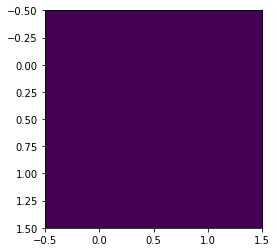

In [13]:
plt.imshow(np.zeros((5,5)))
plt.imshow(np.zeros((2,2)))



ENDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

In [ ]:
class SARSA: 
    def __init__(self, actions = ["up", "down", "left", "right"], learning_rate, gamma):
        self.actions = actions
        
        #set grid object
        self.grid = Gridworld((5,5), 2)
        
        #Q-Table
        self.q_table = np.zeros((len(self.actions), self.grid.shape[0], self.grid.shape[1]))
        
        #Current agent position
        self.position = (0,0) #start always in (0,0)
        
    def e_greedy(self):
        eps = 0.25
        p = np.random.random()
        
        #random
        if p <= eps:
            return random.choice(self.actions)
        
        #choose according to policy/max Q-value action
        else:
            q_values = [:, self.position[0], self.position[1]]
            return (self.actions[np.argmax[q_values]], q_values[np.argmax[q_values]])
    
            
    def steps_episode(self):
        end = False
        actions = {"up" : [0,1],
                   "down" : [0,-1],
                   "left" : [-1,0],
                   "right" : [1,0]}
        
        #Select action to take        
        action, q_val_old = e_greedy()
         
        
        while end == False:       
            print("hallo")
        
        
        
        #execute action: observe R and S'
        reward, e = self.grid.step(actions[action])
        
        
        #Choose A' from S' using policy derived from Q
        
        
        
        
        
        #update 
        self.q_table[?, self.position[0], self.position[1]] = q_val_old + learning_rate * (reward + gamma * q_val_new - q_val_old)
        
        #ToDo 
        # q-value new
        # wie funktioniert formel nochmal 
        #n-step 
        # epsilon greedy besser
        
        # dieser bool interessiert doch nur, wenn wir womöglich zu viele steps samplen wenn man q-value nimmt nicht?
        
        #according to policy   
        
        
        
        
        #current state
        
        
        
        
        
    

In [110]:
a = np.array([1,2,3])
np.argmax(a)



2

[[ 2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0. 10.  0.  0.  0.]]
[[ 2.  0.  0.  0.  0.]
 [ 0.  5.  0.  0.  5.]
 [-1.  0.  5.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0. 10.  0.  0.  0.]]


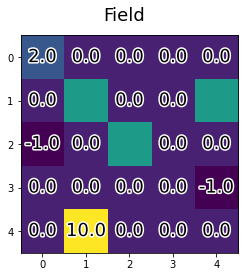

In [104]:
 Gridworld((5,5), 2).s()s

In [10]:
a = np.zeros((2,2))
a[0,0] = 1
a[1,0] = 2
print(a)

t = np.where(((a != 1)&(a!=2)), a)
t

[[1. 0.]
 [2. 0.]]


ValueError: either both or neither of x and y should be given

In [35]:
rand.randint(5)

3

In [47]:
arr = np.zeros((5,5))
arr[0,1]= -1
arr[2,2] = -1
arr

array([[ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [ ]:
#take random sample of action space

#follow policy

#Do we initialize policy randomly in beginning? And if so how?

In [91]:
a= np.full((3,3), fill_value= 3)
a[:,:]= 0
a

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [2]:
def test(x):
    if x<3:
        pass
    else: 
        return x

In [7]:
class A:
    def __init__(self):
        self.a = 2
        

        


In [5]:
class B: 
    def _init_(self):
        self.b = 5
        
    def test(self,a):
        a.a = 0

In [11]:
a = A()
b = B()

b.test(a)
a.a

0

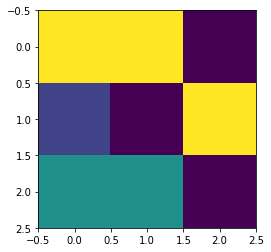

In [29]:

a = np.array([[10,10,0],[2,0,10],[5,5,0]])
             

cmap = colors.ListedColormap(['green', 'blue', 'yellow'])
bounds = [10,5,2]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.imshow(a)

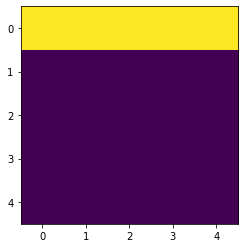

In [24]:
a = np.zeros((5,5))
from matplotlib import colors
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

a[0] = 10
plt.imshow(a)

